In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [34]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summery data
df = pd.read_sql_query("select * from vendor_sales_summery", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,TotalPurchaseDollars,Volume,TotalPurchasesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,TotalSalesQuantity,GrossProfit,ProfitMargin,StockTurnover,SalespurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,3811251.60,1750.0,145080,3201844.22,441868.14,164589.18,68601.68,89578.0,-609407.38,-19.033012,0.617439,0.840103
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,3804041.22,1750.0,164038,2958675.28,369117.06,180190.31,144929.24,98068.0,-845365.94,-28.572447,0.597837,0.777772
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,3418303.68,1750.0,187407,3011126.30,305995.78,228060.20,123780.22,124120.0,-407177.38,-13.522428,0.662302,0.880883
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,3261197.94,1750.0,201682,2443144.75,274205.10,197200.85,257032.07,107325.0,-818053.19,-33.483615,0.532150,0.749156
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,3023206.01,1750.0,138109,2668148.63,356089.29,157899.82,257032.07,85937.0,-355057.38,-13.307256,0.622240,0.882556


In [35]:
# summery statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchasesQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalSalesDollars,10692.0,2.597058e+04,104582.427757,0.00,269.970000,2834.425000,17001.492500,3.201844e+06
TotalSalesPrice,10692.0,1.176046e+04,29005.615080,0.00,82.972500,1474.975000,9590.950000,4.418681e+05
TotalExciseTax,10692.0,1.116066e+03,6988.635102,0.00,1.890000,24.145000,241.722500,2.280602e+05


**Summary Statistics Insights:**
    
**Negative & Zero Values:**
    
• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

• Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

• Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.

**Outliers Indicated by High Standard Deviations:**

• Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

• Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.
LUK IManes

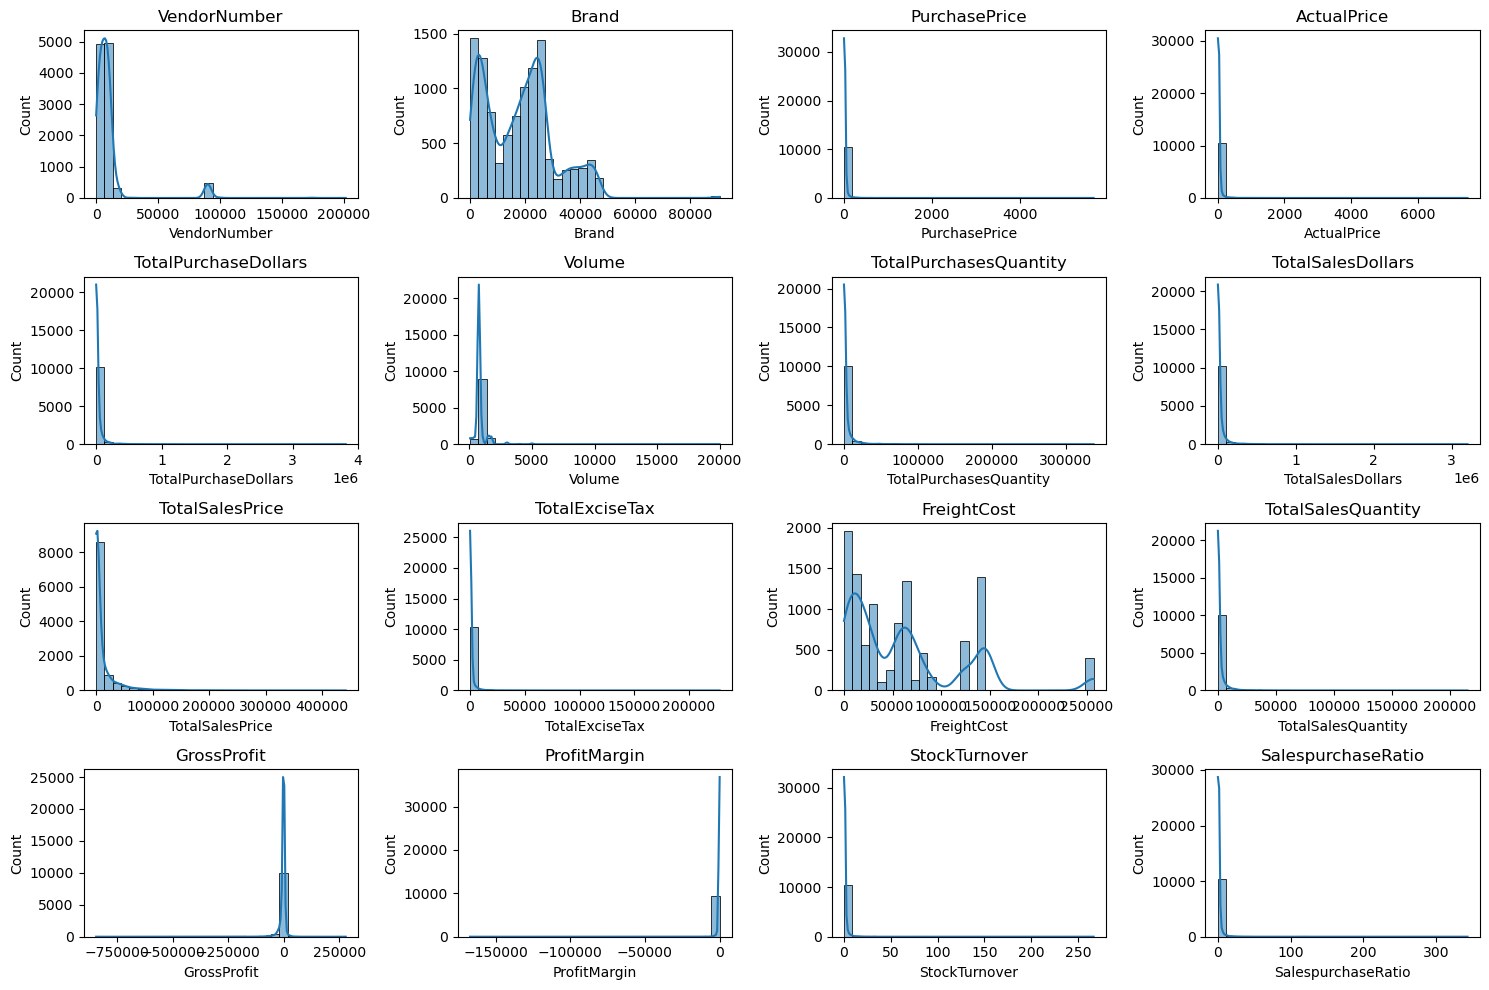

In [37]:
# Distribution plots for Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1) # adjust grid layout as needed.
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

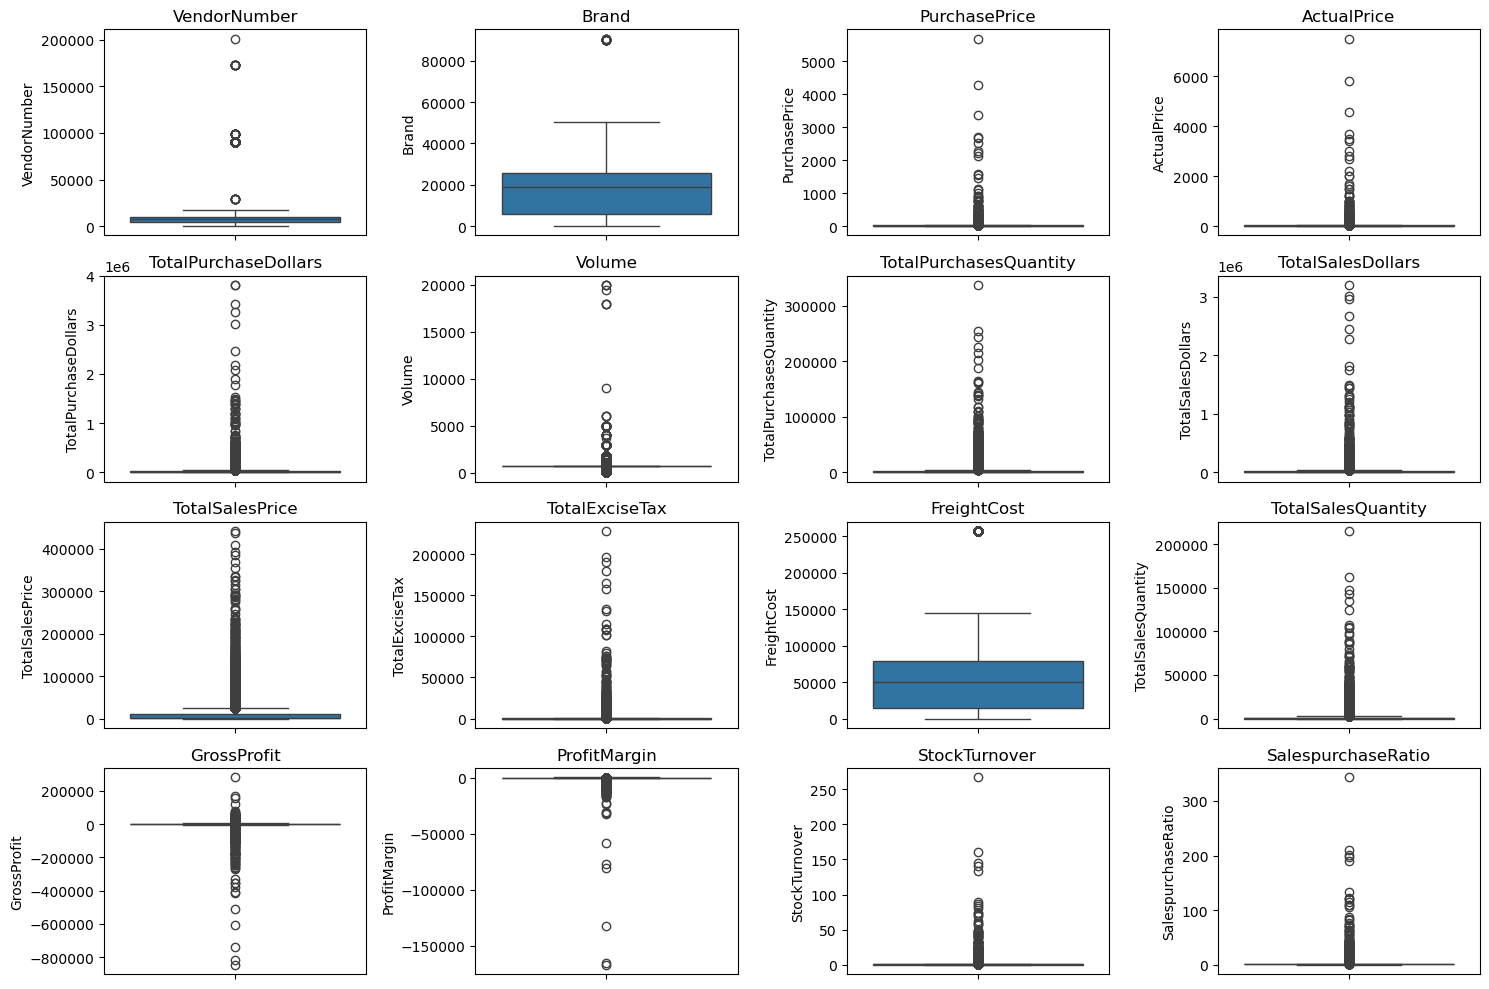

In [38]:
# outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1) # adjust grid layout as needed.
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
# lets filter the data by removing inconsistencies
df = pd.read_sql_query(''' select * from vendor_sales_summery
    where GrossProfit >0 and ProfitMargin > 0 AND TotalSalesQuantity > 0
    ''', conn)
    

In [40]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,TotalPurchaseDollars,Volume,TotalPurchasesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,TotalSalesQuantity,GrossProfit,ProfitMargin,StockTurnover,SalespurchaseRatio
0,10000,MAJESTIC FINE WINES,6570,Kendall Jackson Chard Vt RSV,6.77,10.99,1460072.36,750.0,215668,1469027.53,124314.72,15126.71,17587.59,134563.0,8955.17,0.609599,0.623936,1.006133
1,3960,DIAGEO NORTH AMERICA INC,4260,Capt Morgan Original Barrel,16.66,21.99,1317439.48,1750.0,79078,1487853.33,109242.13,132878.10,257032.07,72317.0,170413.85,11.453673,0.914502,1.129352
2,7245,PROXIMO SPIRITS INC.,3802,Three Olives Vodka,13.43,18.99,1034996.38,1750.0,77066,1097286.88,228755.29,109159.41,38994.78,59412.0,62290.50,5.676774,0.770924,1.060184
3,480,BACARDI USA INC,4227,Bacardi Superior Rum Trav,14.17,17.99,967725.98,1750.0,68294,1247457.29,167226.35,130401.12,89286.27,70971.0,279731.31,22.424119,1.039198,1.289060
4,1392,CONSTELLATION BRANDS INC,6682,R M Woodbridge Chard Cal,6.03,8.99,612328.41,1500.0,101547,662243.05,106908.98,14809.65,79528.99,65895.0,49914.64,7.537209,0.648911,1.081516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,2.84,50.0,2,23.88,1.99,0.63,257032.07,12.0,21.04,88.107203,6.000000,8.408451
3935,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,2.64,750.0,2,15.95,10.96,0.55,27100.41,5.0,13.31,83.448276,2.500000,6.041667
3936,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,2.34,50.0,6,62.72,0.98,6.72,50293.62,128.0,60.38,96.269133,21.333333,26.803419
3937,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,1.47,200.0,1,83.58,41.79,8.82,257032.07,42.0,82.11,98.241206,42.000000,56.857143


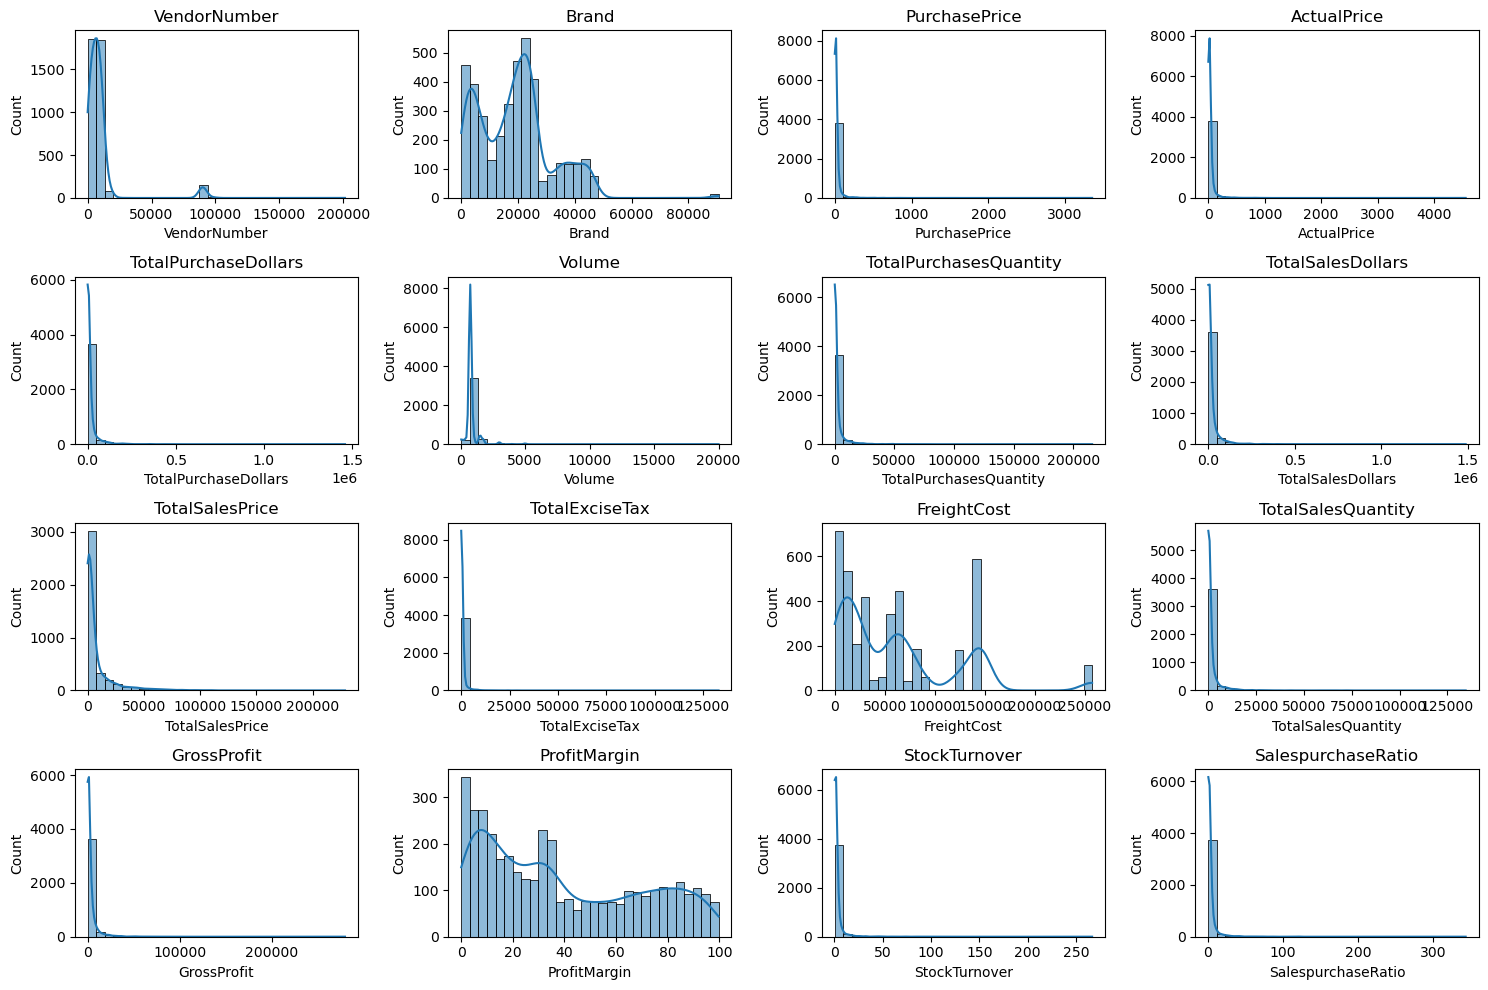

In [41]:
# Distribution plots for Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1) # adjust grid layout as needed.
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

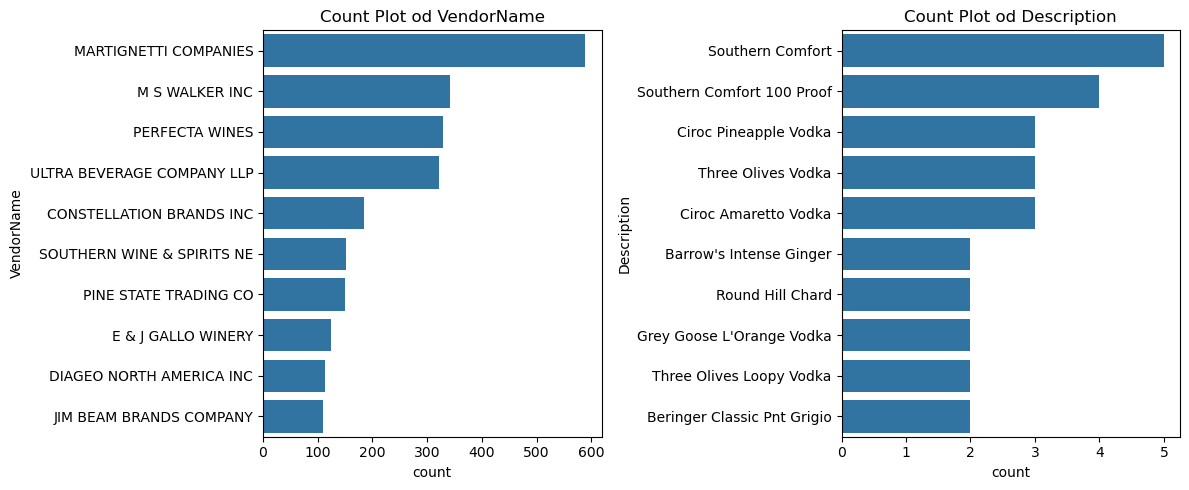

In [42]:
# count plots for Categorical Columns
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f'Count Plot od {col}')
plt.tight_layout()
plt.show()

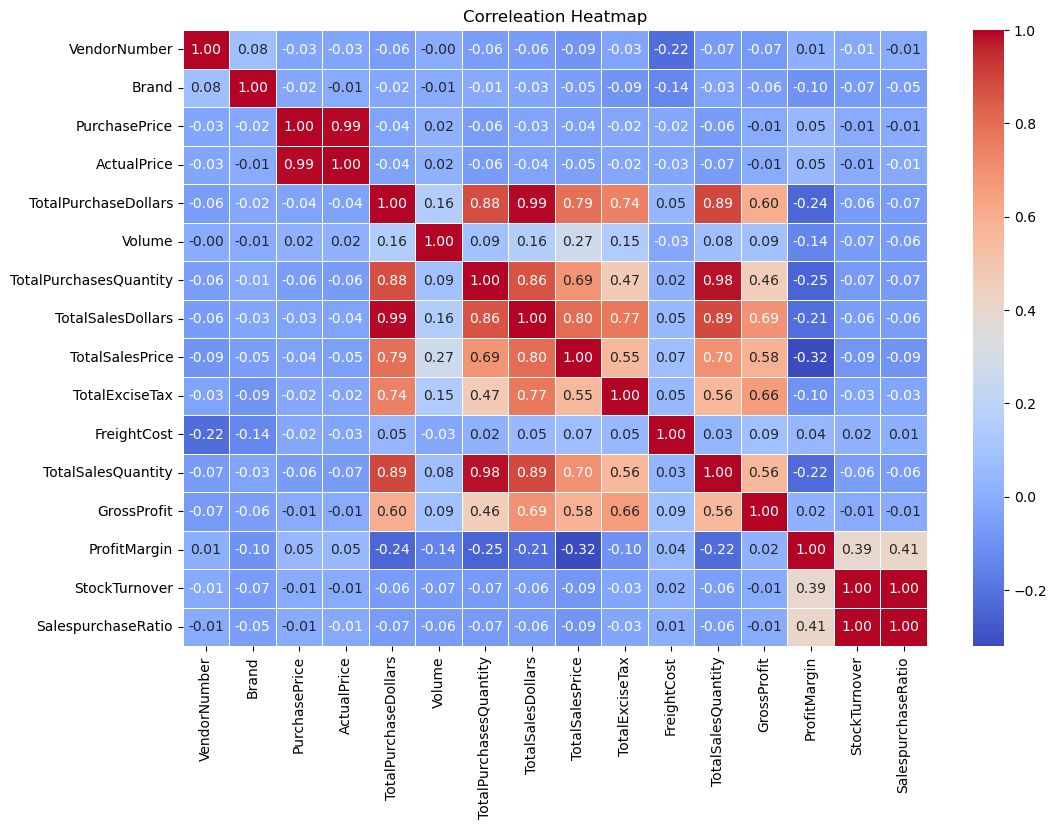

In [58]:
# correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correleation Heatmap')
plt.show()


**Correlation Insights**

• PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales 
revenue or profit.

• Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

• StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

**Data Analysis**

Identify Brands that needs promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [80]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'}).reset_index()

brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,10 Span Pnt Gris Monterey Cy,1438.08,1.869159
1,12 Days of Pearls Gift Set,309.69,97.678323
2,13 Celsius Svgn Bl,20475.65,29.625384
3,14 Hands Cab Svgn Wash,170186.42,0.702177
4,14 Hands Chard Wash,36723.02,2.364648
...,...,...,...
3806,Zinsane Znfdl Lodi,14733.56,98.375410
3807,Zion Dolev Muscato,1208.90,69.502854
3808,Zonin Moscato,239.76,18.318318
3809,Zorah Red,417.81,67.559417


In [74]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [76]:
print(low_sales_threshold)
print(high_margin_threshold)

391.82
79.41496370868072


In [84]:
# filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print('Brand with low sales but high profit margins:')
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
1162,Concannon Glen Ellen Wh Zin,15.95,83.448276
1222,Crown Royal Apple,23.88,88.107203
3113,Sauza Sprklg Wild Berry Marg,27.96,82.153076
3566,Tracia Syrah,44.94,88.495772
309,Basilica Amaretto,47.45,85.079031
...,...,...,...
3308,St Elder Elderflower Liqueur,361.35,98.428117
3313,St Germain Liqueur,374.75,97.038025
1019,Chanrion Cote de Brouilly,379.80,93.333333
610,Canaletto Pnt Grigio Venezie,381.58,82.216049


In [92]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']< 10000]

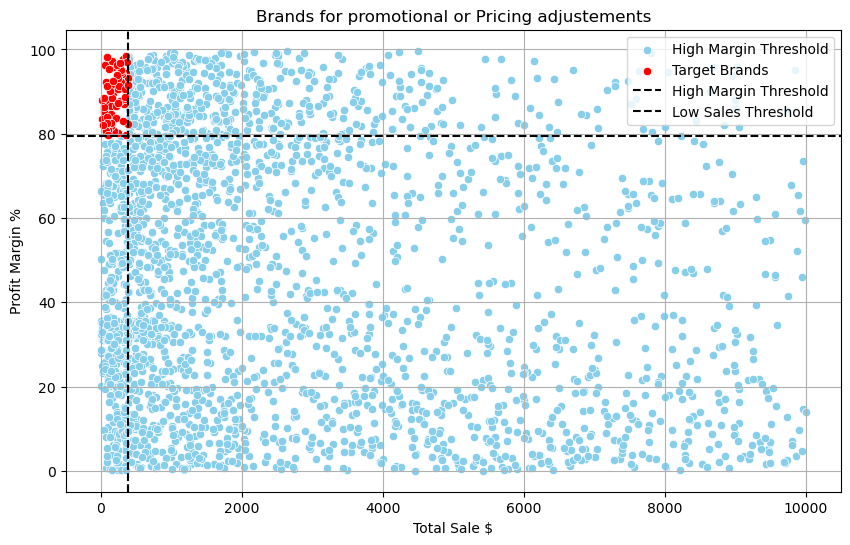

In [100]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x= 'TotalSalesDollars', y = 'ProfitMargin', label = 'High Margin Threshold', color= 'skyblue')
sns.scatterplot(data=target_brands, x= 'TotalSalesDollars', y = 'ProfitMargin', label = 'Target Brands', color='red')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel('Total Sale $')
plt.ylabel('Profit Margin %')
plt.title('Brands for promotional or Pricing adjustements')
plt.legend()
plt.grid(True)
plt.show()

**which vendors and brands demonstrate the highest sales performance?**

In [110]:
def format_dollars(value):
    if value>= 1_000_000:
        return f'{value / 1_000_000: .2f} M'
    elif value >= 1_000:
        return f'{value/1_000: .2f} K'
    else:
        return str(value)

In [112]:
# top vendor & brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
print(top_vendors)
print('*'*50)
print(top_brands)

VendorName
MARTIGNETTI COMPANIES         9050952.19
CONSTELLATION BRANDS INC      8982053.36
E & J GALLO WINERY            3861239.75
ULTRA BEVERAGE COMPANY LLP    3855827.21
DIAGEO NORTH AMERICA INC      3726390.52
WINE GROUP INC                3341641.35
PROXIMO SPIRITS INC.          3243081.35
BACARDI USA INC               3128241.01
M S WALKER INC                2862759.75
TREASURY WINE ESTATES         2375134.93
Name: TotalSalesDollars, dtype: float64
**************************************************
Description
Capt Morgan Original Barrel     1487853.33
Kendall Jackson Chard Vt RSV    1469027.53
Bacardi Superior Rum Trav       1247457.29
Three Olives Vodka              1202657.57
R M Woodbridge Chard Cal         679589.31
Southern Comfort                 600063.27
MezzaCorona Pnt Grigio           513469.72
Clos du Bois Chard               451843.55
1800 Silver Tequila              444979.99
R M Woodbridge Cab Svgn Cal      433428.38
Name: TotalSalesDollars, dtype: float64


In [114]:
top_brands.apply(lambda x: format_dollars(x))

Description
Capt Morgan Original Barrel        1.49 M
Kendall Jackson Chard Vt RSV       1.47 M
Bacardi Superior Rum Trav          1.25 M
Three Olives Vodka                 1.20 M
R M Woodbridge Chard Cal         679.59 K
Southern Comfort                 600.06 K
MezzaCorona Pnt Grigio           513.47 K
Clos du Bois Chard               451.84 K
1800 Silver Tequila              444.98 K
R M Woodbridge Cab Svgn Cal      433.43 K
Name: TotalSalesDollars, dtype: object

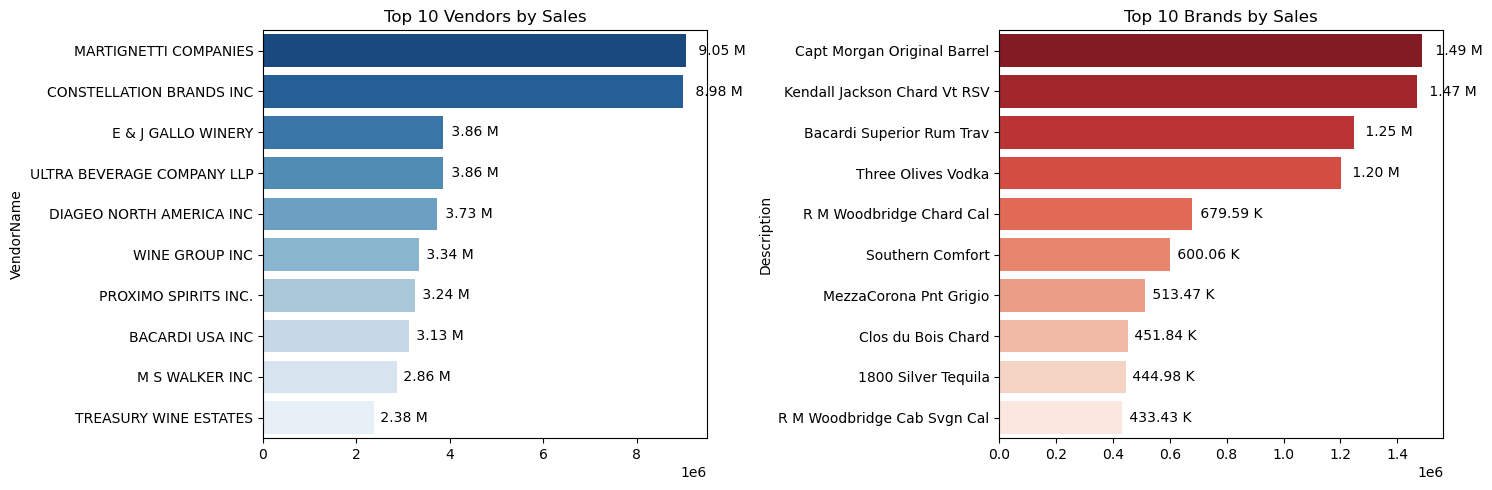

In [120]:
plt.figure(figsize=(15,5))
# plot for top vendor
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()* 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left', va='center', fontsize=10, color='black')

# plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()* 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**which vendors contribute the most to total purchase dollars:**

In [151]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(98, 4)

In [167]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [169]:
# display Top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['Totalsalesdollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Totalsalesdollars
14,CONSTELLATION BRANDS INC,8.03 M,953.31 K,8982053.36,14.01,8.98 M
46,MARTIGNETTI COMPANIES,6.90 M,2.15 M,9050952.19,12.05,9.05 M
23,E & J GALLO WINERY,3.39 M,475.71 K,3861239.75,5.91,3.86 M
19,DIAGEO NORTH AMERICA INC,3.15 M,577.57 K,3726390.52,5.50,3.73 M
97,WINE GROUP INC,3.04 M,296.64 K,3341641.35,5.31,3.34 M
61,PROXIMO SPIRITS INC.,2.98 M,265.08 K,3243081.35,5.20,3.24 M
88,ULTRA BEVERAGE COMPANY LLP,2.85 M,1.01 M,3855827.21,4.97,3.86 M
2,BACARDI USA INC,2.40 M,729.42 K,3128241.01,4.19,3.13 M
43,M S WALKER INC,2.24 M,621.03 K,2862759.75,3.91,2.86 M
85,TREASURY WINE ESTATES,2.06 M,316.81 K,2375134.93,3.59,2.38 M


In [153]:
top_vendors['PurchaseContribution%'].sum()

0.6400000000000001

In [171]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Totalsalesdollars,Cumulative_Contribution%
14,CONSTELLATION BRANDS INC,8.03 M,953.31 K,8982053.36,14.01,8.98 M,14.01
46,MARTIGNETTI COMPANIES,6.90 M,2.15 M,9050952.19,12.05,9.05 M,26.06
23,E & J GALLO WINERY,3.39 M,475.71 K,3861239.75,5.91,3.86 M,31.97
19,DIAGEO NORTH AMERICA INC,3.15 M,577.57 K,3726390.52,5.50,3.73 M,37.47
97,WINE GROUP INC,3.04 M,296.64 K,3341641.35,5.31,3.34 M,42.78
61,PROXIMO SPIRITS INC.,2.98 M,265.08 K,3243081.35,5.20,3.24 M,47.98
88,ULTRA BEVERAGE COMPANY LLP,2.85 M,1.01 M,3855827.21,4.97,3.86 M,52.95
2,BACARDI USA INC,2.40 M,729.42 K,3128241.01,4.19,3.13 M,57.14
43,M S WALKER INC,2.24 M,621.03 K,2862759.75,3.91,2.86 M,61.05
85,TREASURY WINE ESTATES,2.06 M,316.81 K,2375134.93,3.59,2.38 M,64.64


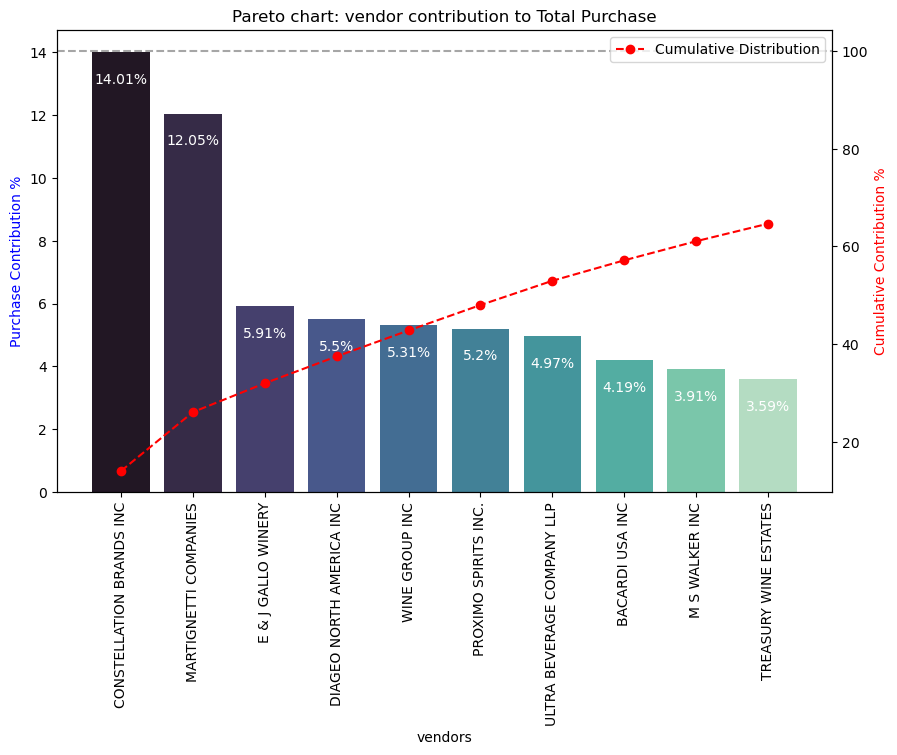

In [173]:
fig, ax1 = plt.subplots(figsize=(10,6))
# bar plot for purchase contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1, str(value)+'%', ha= 'center', fontsize=10, color = 'white')

# line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Distribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('vendors')
ax1.set_title('Pareto chart: vendor contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

**How much of total procurment is dependent on the top vendors?**

In [178]:
print(f'Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%')

Total Purchase Contribution of top 10 vendors is 64.64%


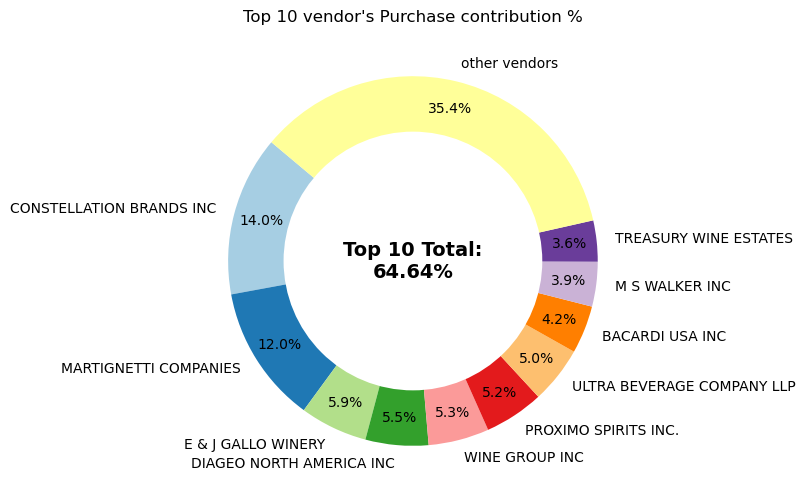

In [194]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# append 'other vendor' category
vendors.append('other vendors')
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(10,6))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# draw a while circle in the centre to create a 'donut' effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# add total contribution annotation in the centre
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 vendor's Purchase contribution %")
plt.show()

**Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?**

In [199]:
df['UnitPurchasePrice']= df['TotalPurchaseDollars']/df['TotalPurchasesQuantity']

In [205]:
df['OrderSize'] = pd.qcut(df['TotalPurchasesQuantity'], q=3, labels=['Samll', 'Medium', 'Large'])

In [207]:
df[['OrderSize', 'TotalPurchasesQuantity']]

,OrderSize,TotalPurchasesQuantity
0,Large,215668
1,Large,79078
2,Large,77066
3,Large,68294
4,Large,101547
...,...,...
3934,Samll,2
3935,Samll,2
3936,Samll,6
3937,Samll,1


In [209]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Samll,49.640363
Medium,17.475793
Large,8.409604


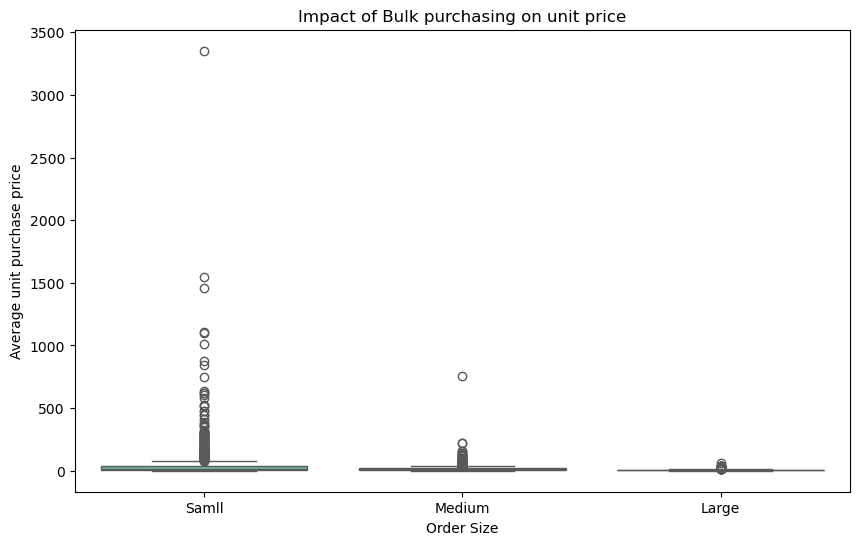

In [215]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='Set2')
plt.title('Impact of Bulk purchasing on unit price')
plt.xlabel('Order Size')
plt.ylabel('Average unit purchase price')
plt.show()


• Vendors buying in bulk (Large Order Size) get the lowest unit price ($8.41 per unit), meaning higher margins if they can manage inventory efficiently.

• The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

• This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit
revenue.

**Which vendors have low inventory turnover, indicating exces stock and slow-moving products?**

In [224]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
THE IMPORTED GRAPE LLC,0.603954
TY KU LLC,0.605769
JEWELL TOWNE VINEYARDS,0.629728
ALISA CARR BEVERAGES,0.650000
LATITUDE BEVERAGE COMPANY,0.650611
WINE GROUP INC,0.659057
Dunn Wine Brokers,0.666667
PARK STREET IMPORTS LLC,0.666667
SURVILLE ENTERPRISES CORP,0.675362


**How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?**

In [235]:
df['UnsoldInventoryValue'] = (df['TotalPurchasesQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total unsold capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total unsold capital:  12.63 M


In [237]:
# aggregate captial locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
\
# sort vendors with the Highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
14,CONSTELLATION BRANDS INC,2.66 M
46,MARTIGNETTI COMPANIES,1.34 M
97,WINE GROUP INC,1.07 M
23,E & J GALLO WINERY,1.03 M
61,PROXIMO SPIRITS INC.,701.62 K
44,MAJESTIC FINE WINES,682.76 K
85,TREASURY WINE ESTATES,595.68 K
77,STE MICHELLE WINE ESTATES,487.15 K
43,M S WALKER INC,447.58 K
19,DIAGEO NORTH AMERICA INC,331.94 K


**What is the 95% confidence intervals for profit margind of top-performing and low-performing vendors**

In [240]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)


In [244]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [246]:
print(top_vendors)
print('*'*50)
print(low_vendors)

0        0.609599
1       11.453673
2        5.676774
3       22.424119
4        7.537209
          ...    
1972    89.852035
1996    92.961453
2013    92.354563
2155    92.362058
2963    98.375410
Name: ProfitMargin, Length: 985, dtype: float64
**************************************************
2287     0.665850
2314     2.402483
2315     4.606252
2337     1.109945
2342     7.436384
          ...    
3934    88.107203
3935    83.448276
3936    96.269133
3937    98.241206
3938    99.166079
Name: ProfitMargin, Length: 985, dtype: float64


In [256]:
def confidance_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (17.74, 20.27, Mean: 19.00
Low Vendors 95% CI: (44.92, 48.25, Mean: 46.59


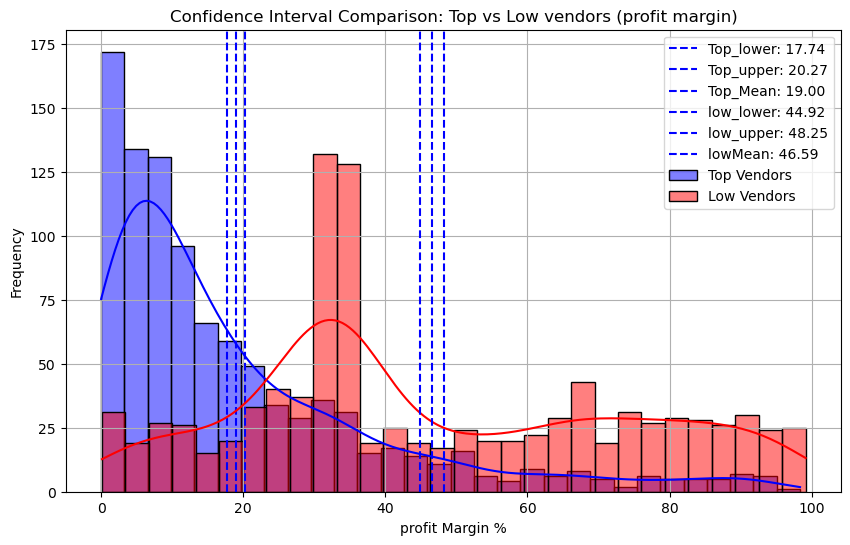

In [276]:
top_mean, top_lower, top_upper = confidance_interval(top_vendors)
low_mean, low_lower, low_upper = confidance_interval(low_vendors)

print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}')

plt.figure(figsize=(10,6))
# Top vendors plt
sns.histplot(top_vendors, kde=True, bins=30, alpha=0.5, color= 'blue', label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle= '--', label=f'Top_lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle= '--', label=f'Top_upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle= '--', label=f'Top_Mean: {top_mean:.2f}')

# Low vendors plt
sns.histplot(low_vendors, kde=True, bins=30, alpha=0.5, color= 'red', label='Low Vendors')
plt.axvline(low_lower, color='blue', linestyle= '--', label=f'low_lower: {low_lower:.2f}')
plt.axvline(low_upper, color='blue', linestyle= '--', label=f'low_upper: {low_upper:.2f}')
plt.axvline(low_mean, color='blue', linestyle= '--', label=f'lowMean: {low_mean:.2f}')

# finalize plot
plt.title('Confidence Interval Comparison: Top vs Low vendors (profit margin)')
plt.xlabel('profit Margin %')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


• The confidence interval for low-performing vendors (44.92% to 48.25%) is significantly higher than that of top-performing vendors (17.74% to 20.27%). 

• This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

• For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies. 

• For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

**Is there a significant difference in profit margins between top-performing and low-performing vendors?**

Hypothesis:

Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [287]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

#perform Two-sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var= False)

# print result
print(f'T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}')

if p_value < 0.05:
    print('Reject Ho: There is a significant differnce in profit margins between top and low performance vendors.')
else:
    print(' Fail to reject Ho: No significant difference in profit margins.')

T-statistic: -25.9289, P-value: 0.0000
Reject Ho: There is a significant differnce in profit margins between top and low performance vendors.
